# Working with datasets

## Load the dataset

In [1]:
#iris, pen-based, adult, wine

In [2]:
import pandas as pd

In [4]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('./datasets/adult.arff')
df = pd.DataFrame(data[0])

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,b'Private',226802.0,b'11th',7.0,b'Never-married',b'Machine-op-inspct',b'Own-child',b'Black',b'Male',0.0,0.0,40.0,b'United-States',b'<=50K'
1,38.0,b'Private',89814.0,b'HS-grad',9.0,b'Married-civ-spouse',b'Farming-fishing',b'Husband',b'White',b'Male',0.0,0.0,50.0,b'United-States',b'<=50K'
2,28.0,b'Local-gov',336951.0,b'Assoc-acdm',12.0,b'Married-civ-spouse',b'Protective-serv',b'Husband',b'White',b'Male',0.0,0.0,40.0,b'United-States',b'>50K'
3,44.0,b'Private',160323.0,b'Some-college',10.0,b'Married-civ-spouse',b'Machine-op-inspct',b'Husband',b'Black',b'Male',7688.0,0.0,40.0,b'United-States',b'>50K'
4,18.0,b'?',103497.0,b'Some-college',10.0,b'Never-married',b'?',b'Own-child',b'White',b'Female',0.0,0.0,30.0,b'United-States',b'<=50K'


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null float64
workclass         48842 non-null object
fnlwgt            48842 non-null float64
education         48842 non-null object
education-num     48842 non-null float64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null float64
capital-loss      48842 non-null float64
hours-per-week    48842 non-null float64
native-country    48842 non-null object
class             48842 non-null object
dtypes: float64(6), object(9)
memory usage: 5.6+ MB


## Encode categorical variables

In [6]:
def encode_label(df):
    #Label
    return df.astype('category').cat.codes

In [7]:
df['workclass'] = encode_label(df['workclass'])
df['education'] = encode_label(df['education'])
df['marital-status'] = encode_label(df['marital-status'])
df['occupation'] = encode_label(df['occupation'])
df['relationship'] = encode_label(df['relationship'])
df['race'] = encode_label(df['race'])
df['sex'] = encode_label(df['sex'])
df['native-country'] = encode_label(df['native-country'])
df['class'] = encode_label(df['class'])


In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,4,226802.0,1,7.0,4,7,3,2,1,0.0,0.0,40.0,39,0
1,38.0,4,89814.0,11,9.0,2,5,0,4,1,0.0,0.0,50.0,39,0
2,28.0,2,336951.0,7,12.0,2,11,0,4,1,0.0,0.0,40.0,39,1
3,44.0,4,160323.0,15,10.0,2,7,0,2,1,7688.0,0.0,40.0,39,1
4,18.0,0,103497.0,15,10.0,4,0,3,4,0,0.0,0.0,30.0,39,0


## Prepare the dataset to train

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('class', axis=1)

In [11]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25.0,4,226802.0,1,7.0,4,7,3,2,1,0.0,0.0,40.0,39
1,38.0,4,89814.0,11,9.0,2,5,0,4,1,0.0,0.0,50.0,39
2,28.0,2,336951.0,7,12.0,2,11,0,4,1,0.0,0.0,40.0,39
3,44.0,4,160323.0,15,10.0,2,7,0,2,1,7688.0,0.0,40.0,39
4,18.0,0,103497.0,15,10.0,4,0,3,4,0,0.0,0.0,30.0,39


In [12]:
y = df['class']

In [13]:
y

0        0
1        0
2        1
3        1
4        0
5        0
6        0
7        1
8        0
9        0
10       1
11       0
12       0
13       0
14       1
15       1
16       0
17       0
18       0
19       1
20       1
21       0
22       0
23       0
24       0
25       1
26       0
27       0
28       0
29       0
        ..
48812    0
48813    1
48814    1
48815    0
48816    0
48817    1
48818    0
48819    1
48820    1
48821    0
48822    0
48823    0
48824    0
48825    0
48826    1
48827    0
48828    0
48829    0
48830    0
48831    0
48832    0
48833    0
48834    0
48835    1
48836    0
48837    0
48838    1
48839    0
48840    0
48841    1
Name: class, Length: 48842, dtype: int8

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Create and fit the model

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [16]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
rfc.score(X_test, y_test)

0.8587914133267155

### Doing cross validation

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
cross_val_score(rfc, X, y, cv=5).mean()

0.857295042928168

In [20]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25.0,4,226802.0,1,7.0,4,7,3,2,1,0.0,0.0,40.0,39
1,38.0,4,89814.0,11,9.0,2,5,0,4,1,0.0,0.0,50.0,39
2,28.0,2,336951.0,7,12.0,2,11,0,4,1,0.0,0.0,40.0,39
3,44.0,4,160323.0,15,10.0,2,7,0,2,1,7688.0,0.0,40.0,39
4,18.0,0,103497.0,15,10.0,4,0,3,4,0,0.0,0.0,30.0,39
5,34.0,4,198693.0,0,6.0,4,8,1,4,1,0.0,0.0,30.0,39
6,29.0,0,227026.0,11,9.0,4,0,4,2,1,0.0,0.0,40.0,39
7,63.0,6,104626.0,14,15.0,2,10,0,4,1,3103.0,0.0,32.0,39
8,24.0,4,369667.0,15,10.0,4,8,4,4,0,0.0,0.0,40.0,39
9,55.0,4,104996.0,5,4.0,2,3,0,4,1,0.0,0.0,10.0,39


## PCA for dimensionality reduction

In [21]:
 from sklearn.decomposition import PCA

In [22]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
y_variance = pca.explained_variance_ratio_

In [24]:
pd.DataFrame(pca.components_, columns=X.columns)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-0.000010,-2.294235e-07,1.000000e+00,-8.281043e-07,-9.437011e-07,4.261951e-07,3.445177e-08,1.379549e-07,-2.167956e-07,1.236515e-07,-2.628525e-04,-0.000017,-0.000002,-0.000004
1,0.000142,7.070009e-06,2.628254e-04,1.499574e-05,4.312401e-05,-8.872918e-06,1.371813e-05,-1.214118e-05,1.303060e-06,2.981349e-06,9.999985e-01,-0.001706,0.000137,-0.000002
2,0.002013,4.346951e-05,1.713208e-05,1.775991e-04,5.412637e-04,-1.316461e-04,1.886357e-04,-2.346921e-04,3.959480e-05,5.508519e-05,1.705629e-03,0.999995,0.001756,0.000061
3,0.958570,5.161265e-03,9.901998e-06,-1.541676e-03,8.821056e-03,-3.240466e-02,1.310114e-03,-3.621778e-02,2.050653e-03,4.788551e-03,-1.793014e-04,-0.002439,0.280380,-0.005156
4,-0.281738,1.616087e-02,-1.263682e-06,2.138351e-02,2.729687e-02,-1.187519e-02,3.197655e-02,-2.088501e-02,2.058228e-03,7.402616e-03,-9.527385e-05,-0.001147,0.957858,0.002870
5,-0.005782,2.048509e-03,-3.690121e-06,-4.135118e-02,-1.982587e-02,4.620152e-03,1.056518e-02,1.209575e-03,-1.512110e-02,5.564924e-04,-6.799821e-08,0.000086,0.002505,-0.998744
6,0.006352,9.571751e-02,6.349305e-08,-5.110236e-02,7.616137e-02,-3.318720e-03,9.900983e-01,-2.671232e-02,1.691824e-03,6.910168e-03,-1.362602e-05,-0.000183,-0.034543,0.011081
7,-0.006176,-8.280569e-03,-9.405147e-07,-9.412988e-01,-3.319497e-01,1.428041e-02,-2.155053e-02,4.415957e-03,-4.525643e-04,4.789204e-03,2.640871e-05,0.000312,0.029618,0.045508
8,0.006058,1.130561e-02,-5.024300e-07,3.299962e-01,-9.377268e-01,2.389129e-02,9.006761e-02,4.959760e-02,-7.181309e-03,5.623246e-05,3.219904e-05,0.000400,0.019315,0.006220
9,0.037731,-2.435226e-01,1.259749e-07,-7.376249e-03,5.611471e-02,4.654501e-01,4.497343e-02,8.268850e-01,-9.192641e-02,-1.542704e-01,3.266120e-06,0.000099,0.037450,0.003504


In [25]:
import seaborn as sns

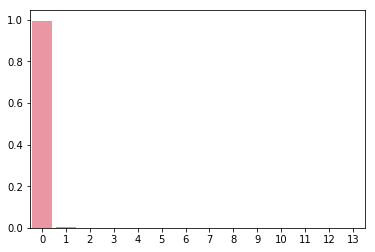

In [26]:
sns.barplot(x=[i for i in range(len(y_variance))], y=y_variance)

In [27]:
pd.DataFrame(pca.components_, columns=X.columns)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-0.000010,-2.294235e-07,1.000000e+00,-8.281043e-07,-9.437011e-07,4.261951e-07,3.445177e-08,1.379549e-07,-2.167956e-07,1.236515e-07,-2.628525e-04,-0.000017,-0.000002,-0.000004
1,0.000142,7.070009e-06,2.628254e-04,1.499574e-05,4.312401e-05,-8.872918e-06,1.371813e-05,-1.214118e-05,1.303060e-06,2.981349e-06,9.999985e-01,-0.001706,0.000137,-0.000002
2,0.002013,4.346951e-05,1.713208e-05,1.775991e-04,5.412637e-04,-1.316461e-04,1.886357e-04,-2.346921e-04,3.959480e-05,5.508519e-05,1.705629e-03,0.999995,0.001756,0.000061
3,0.958570,5.161265e-03,9.901998e-06,-1.541676e-03,8.821056e-03,-3.240466e-02,1.310114e-03,-3.621778e-02,2.050653e-03,4.788551e-03,-1.793014e-04,-0.002439,0.280380,-0.005156
4,-0.281738,1.616087e-02,-1.263682e-06,2.138351e-02,2.729687e-02,-1.187519e-02,3.197655e-02,-2.088501e-02,2.058228e-03,7.402616e-03,-9.527385e-05,-0.001147,0.957858,0.002870
5,-0.005782,2.048509e-03,-3.690121e-06,-4.135118e-02,-1.982587e-02,4.620152e-03,1.056518e-02,1.209575e-03,-1.512110e-02,5.564924e-04,-6.799821e-08,0.000086,0.002505,-0.998744
6,0.006352,9.571751e-02,6.349305e-08,-5.110236e-02,7.616137e-02,-3.318720e-03,9.900983e-01,-2.671232e-02,1.691824e-03,6.910168e-03,-1.362602e-05,-0.000183,-0.034543,0.011081
7,-0.006176,-8.280569e-03,-9.405147e-07,-9.412988e-01,-3.319497e-01,1.428041e-02,-2.155053e-02,4.415957e-03,-4.525643e-04,4.789204e-03,2.640871e-05,0.000312,0.029618,0.045508
8,0.006058,1.130561e-02,-5.024300e-07,3.299962e-01,-9.377268e-01,2.389129e-02,9.006761e-02,4.959760e-02,-7.181309e-03,5.623246e-05,3.219904e-05,0.000400,0.019315,0.006220
9,0.037731,-2.435226e-01,1.259749e-07,-7.376249e-03,5.611471e-02,4.654501e-01,4.497343e-02,8.268850e-01,-9.192641e-02,-1.542704e-01,3.266120e-06,0.000099,0.037450,0.003504


In [28]:
import seaborn as sns

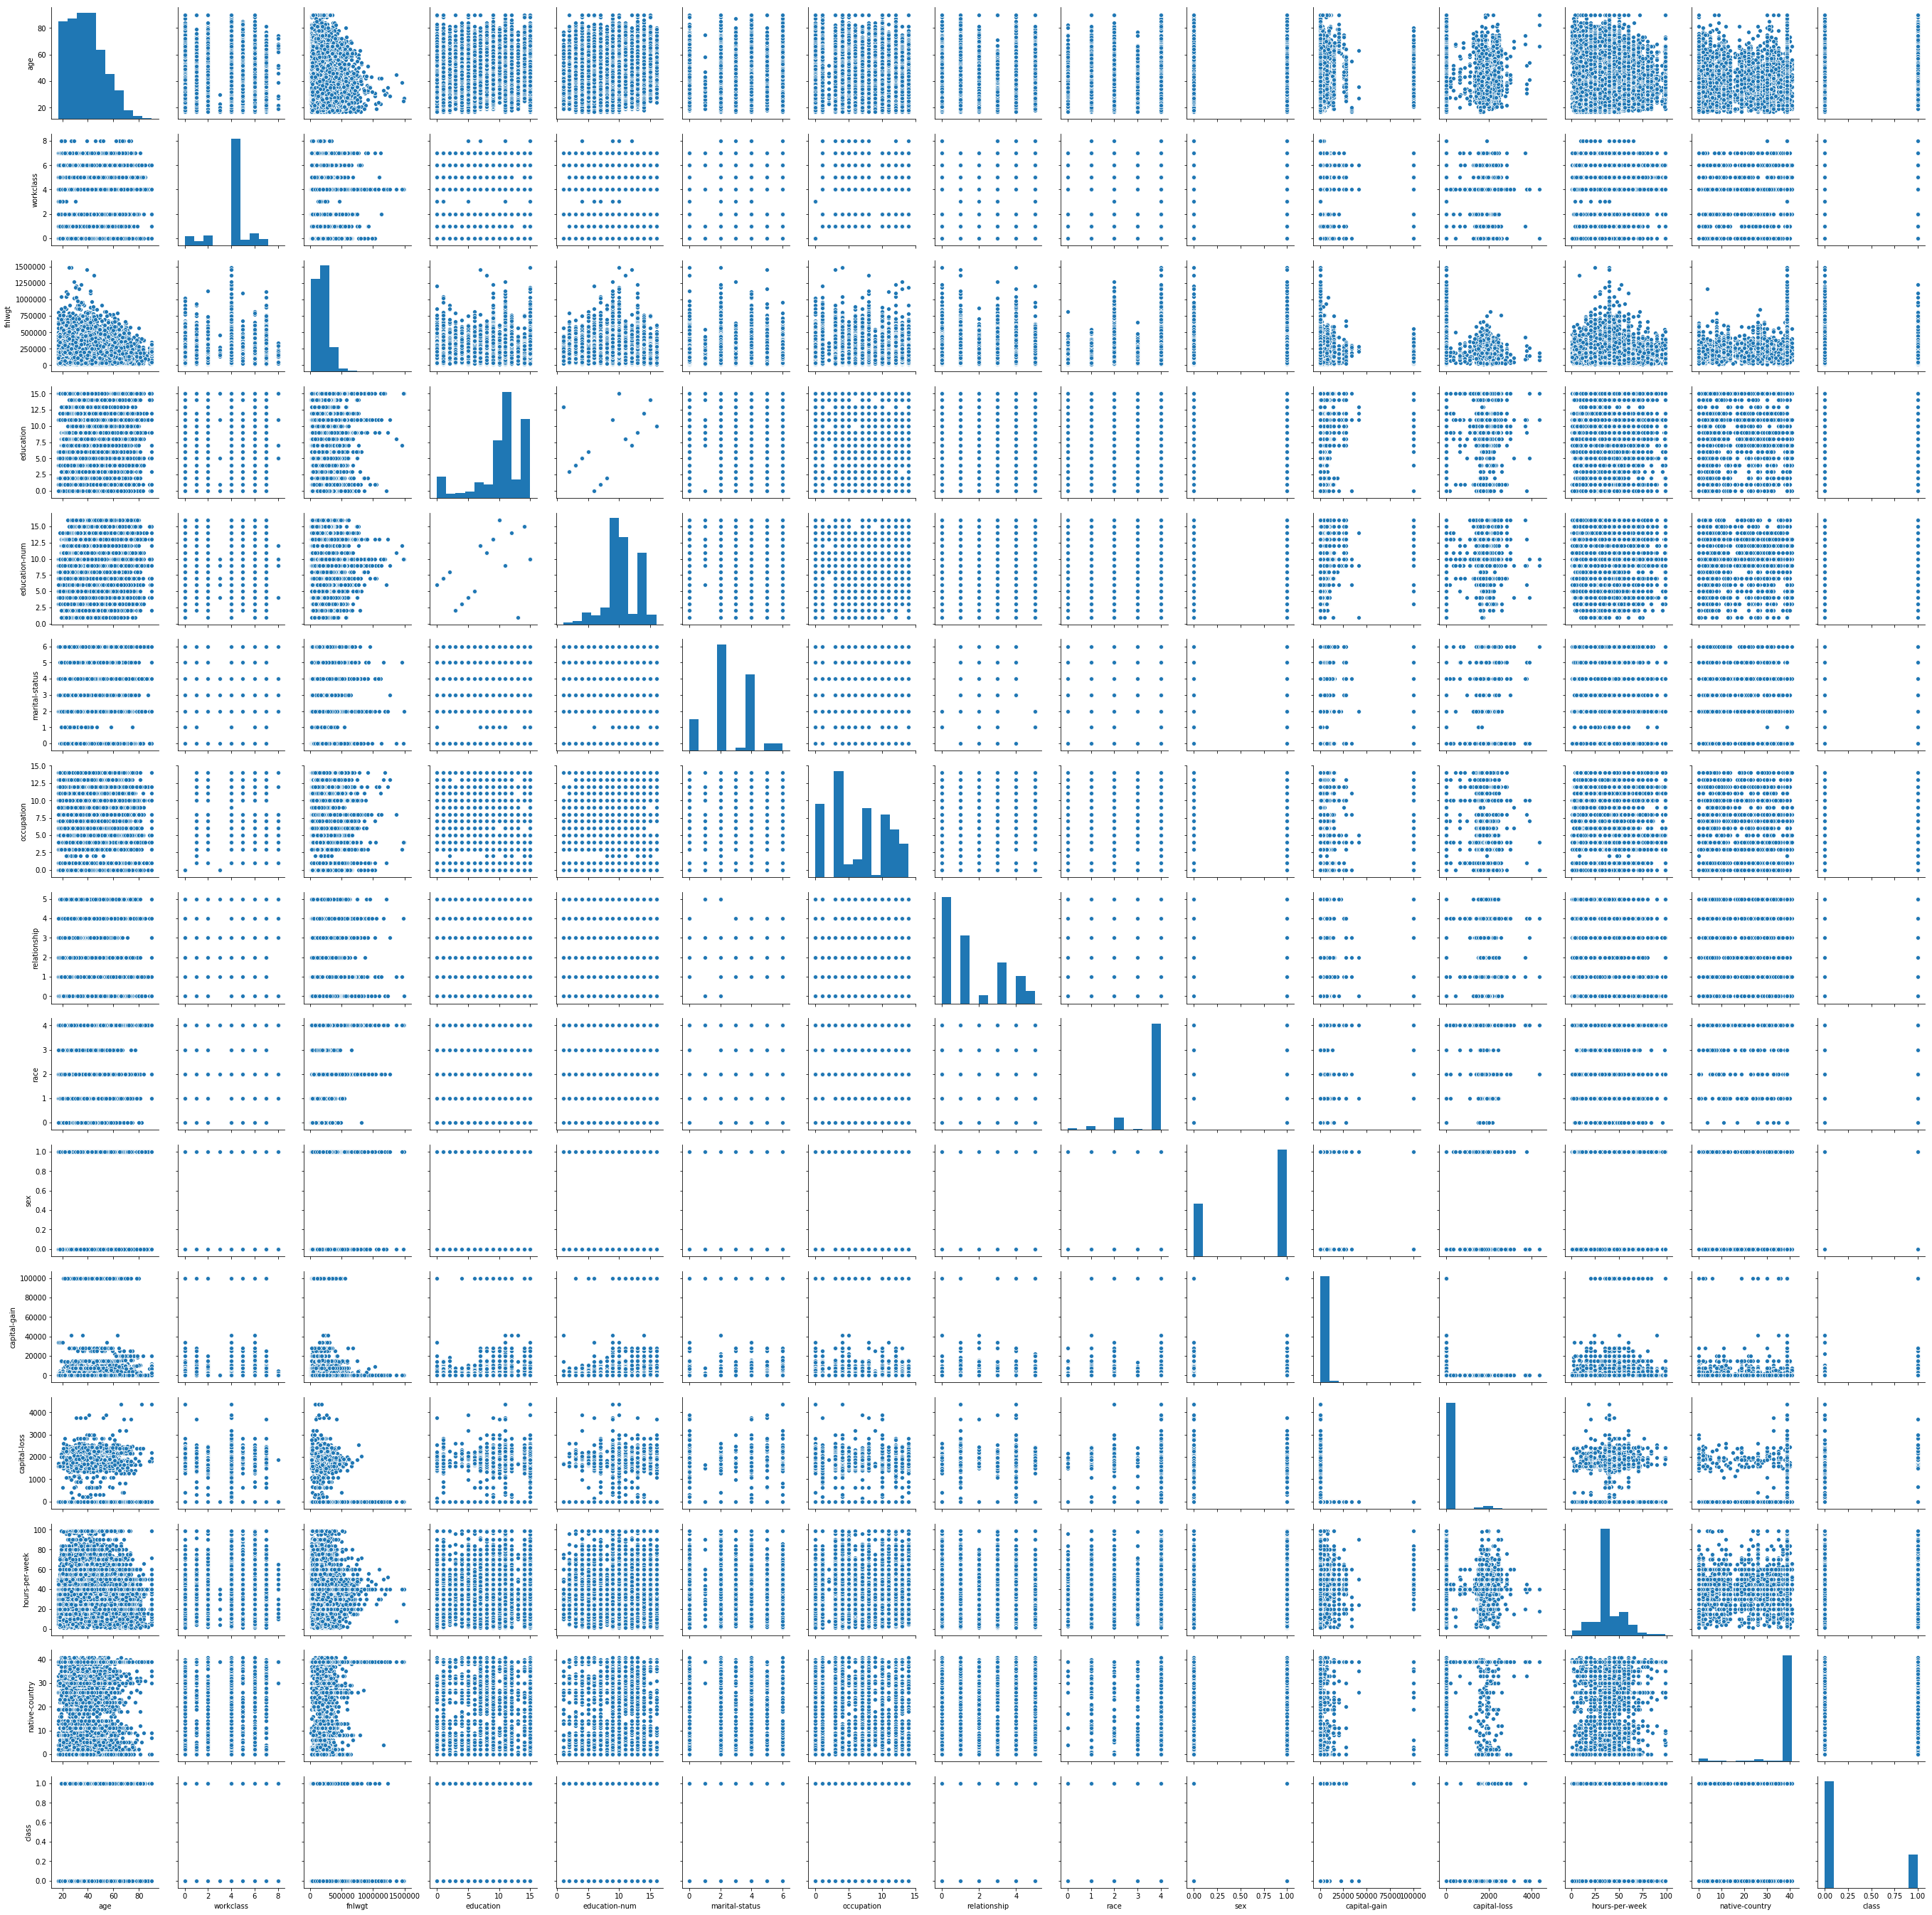

In [29]:
sns.pairplot(df)

In [30]:
X_pca = pca.transform(X)

In [31]:
df_pca = pd.DataFrame(X_pca)

In [32]:
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,37138.149346,-1069.158217,-88.737988,-12.548281,3.285130,-1.830966,0.609996,9.867208,-0.182240,1.385362,0.085703,0.534686,1.544630,0.534569
1,-99849.846052,-1105.158670,-91.037620,1.537647,9.669215,-1.892990,-1.910301,0.135435,1.191920,-1.413784,-0.327333,-0.042631,-0.148228,0.043196
2,147287.145479,-1040.207436,-86.839382,-8.374537,2.751613,-2.606959,4.569353,2.325188,-2.801345,-1.179723,-1.405708,-2.161554,-0.245472,0.037556
3,-29342.869359,6601.360883,-76.720709,3.806154,-2.248693,-2.347294,0.221526,-4.200422,1.823993,-1.227497,-0.429491,-0.138207,1.824510,0.109245
4,-86166.846299,-1101.568043,-90.879471,-23.308661,-4.075966,-2.111870,-6.900897,-4.265515,0.760812,1.425984,-1.826970,-2.155207,-0.527160,-0.339034


In [33]:
import matplotlib.pyplot as plt

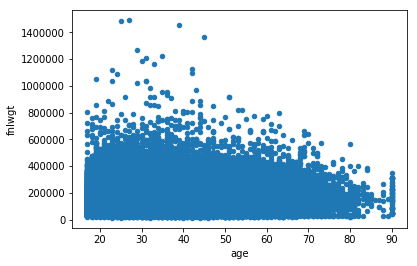

In [34]:
df.plot.scatter(x='age', y='fnlwgt')

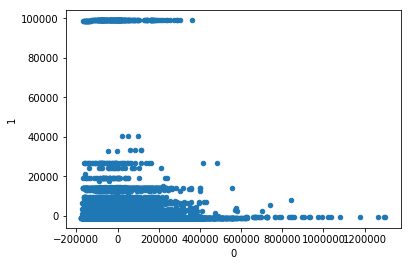

In [35]:
df_pca.plot.scatter(x=0,y=1)

### Checking the new accuracy

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
cross_val_score(rfc, X_pca, y, cv=5).mean()

0.8535072395933284

In [37]:
from sklearn.svm import SVC

In [38]:
clf = SVC()

In [39]:
cross_val_score(clf, X_pca, y, cv=5).mean()

/home/jan/anaconda3/envs/IML/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jan/anaconda3/envs/IML/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jan/anaconda3/envs/IML/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jan/anaconda3/envs/IML/lib/pyth

0.7610867614373603

# Clustering

In [40]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
0     48842 non-null float64
1     48842 non-null float64
2     48842 non-null float64
3     48842 non-null float64
4     48842 non-null float64
5     48842 non-null float64
6     48842 non-null float64
7     48842 non-null float64
8     48842 non-null float64
9     48842 non-null float64
10    48842 non-null float64
11    48842 non-null float64
12    48842 non-null float64
13    48842 non-null float64
dtypes: float64(14)
memory usage: 5.2 MB


In [41]:
from sklearn.cluster import KMeans

In [42]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [43]:
kmeans.labels_

array([0, 1, 2, ..., 0, 0, 0], dtype=int32)

In [44]:
kmeans.inertia_

122744803118486.14

In [45]:
df['KMEANS'] = kmeans.labels_

In [46]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,KMEANS
0,25.0,4,226802.0,1,7.0,4,7,3,2,1,0.0,0.0,40.0,39,0,0
1,38.0,4,89814.0,11,9.0,2,5,0,4,1,0.0,0.0,50.0,39,0,1
2,28.0,2,336951.0,7,12.0,2,11,0,4,1,0.0,0.0,40.0,39,1,2
3,44.0,4,160323.0,15,10.0,2,7,0,2,1,7688.0,0.0,40.0,39,1,0
4,18.0,0,103497.0,15,10.0,4,0,3,4,0,0.0,0.0,30.0,39,0,1


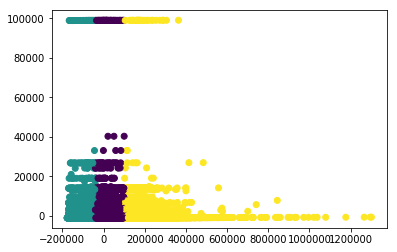

In [47]:
plt.scatter(x=df_pca[0], y=df_pca[1], c=kmeans.labels_*2 )

## Finding the best k

In [48]:
import numpy as np

In [49]:
costs = []
calinskis = []

for k in range(2,20):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X_pca)
  costs.append(kmeans.inertia_)
  c = calinski_harabaz_score(X_pca, kmeans.labels_)
  calinskis.append(c)

NameError: name 'calinski_harabaz_score' is not defined

In [ ]:
a = np.array(costs)/10000000000000

In [ ]:
a

In [ ]:
b = np.array(list(range(2,20)))

In [ ]:
b

In [ ]:
plt.scatter(x=b, y=a)

## Calinski-Harabaz

In [ ]:
from sklearn.metrics import calinski_harabaz_score

In [ ]:
calinski_harabaz_score(X_pca, kmeans.labels_)

In [ ]:
plt.scatter(x=b, y=calinskis)